## BARREL Create Background Model


### Setup
Start by importing libraries and loading data from a potentially interesting event.

In this guide, we are going to use interactive plots, so `%matplotlib ipympl` should be set.

In [1]:
%matplotlib ipympl
import pyspedas, pytplot


For our example, we will look at data form flight 1G from January 17th - 19th, 2013.

FSPC and SSPC data can be downloaded with the `pyspedas.barrel` helper functions:

In [2]:
trange=['2013-01-17', '2013-01-19']

pyspedas.barrel.fspc(
    trange=trange,
    probe='1G'
)

pyspedas.barrel.sspc(
    trange=trange,
    probe='1G'
)

28-Sep-23 12:19:26: File is current: barrel_data/l2/1g/fspc/bar_1g_l2_fspc_20130117_v10.cdf
28-Sep-23 12:19:27: File is current: barrel_data/l2/1g/fspc/bar_1g_l2_fspc_20130118_v10.cdf
28-Sep-23 12:20:23: File is current: barrel_data/l2/1g/sspc/bar_1g_l2_sspc_20130117_v10.cdf
28-Sep-23 12:20:23: File is current: barrel_data/l2/1g/sspc/bar_1g_l2_sspc_20130118_v10.cdf


['brl1G_Quality',
 'brl1G_SSPC',
 'brl1G_Peak_511',
 'brl1G_SSPC_UNCAL',
 'brl1G_Quality',
 'brl1G_SSPC',
 'brl1G_Peak_511',
 'brl1G_SSPC_UNCAL']

### Background subtraction
Plot FSPC1 for the loaded data and visually determine the start and stop locations for the background selection.

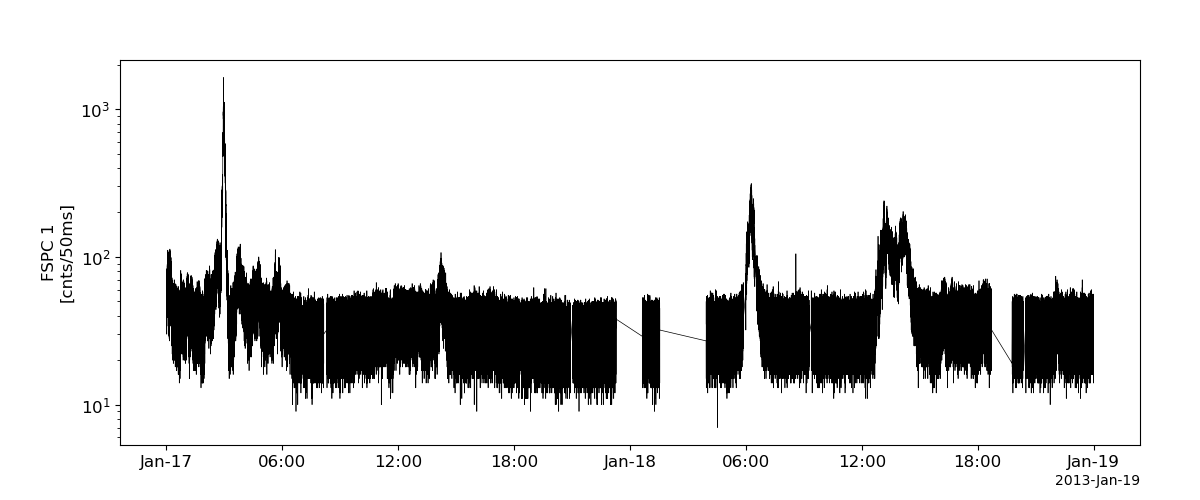

In [3]:
pytplot.tplot('brl1G_FSPC1')

By moving the mouse cursor over a quite area of the plot, we can estimate values for the start and stop times.

In [5]:
bkg_start="2013-01-17/17:25"
bkg_end="2013-01-17/20:35"

Next, we will extract the SSPC data during that time range so we can calcuate the background.

28-Sep-23 18:25:16: /home/wrexroad/anaconda3/envs/pybdas/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)

28-Sep-23 18:25:16: /home/wrexroad/anaconda3/envs/pybdas/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)



28-Sep-23 18:25:16: Too many dimensions on the variable: brl1G_SSPC_BGSUB


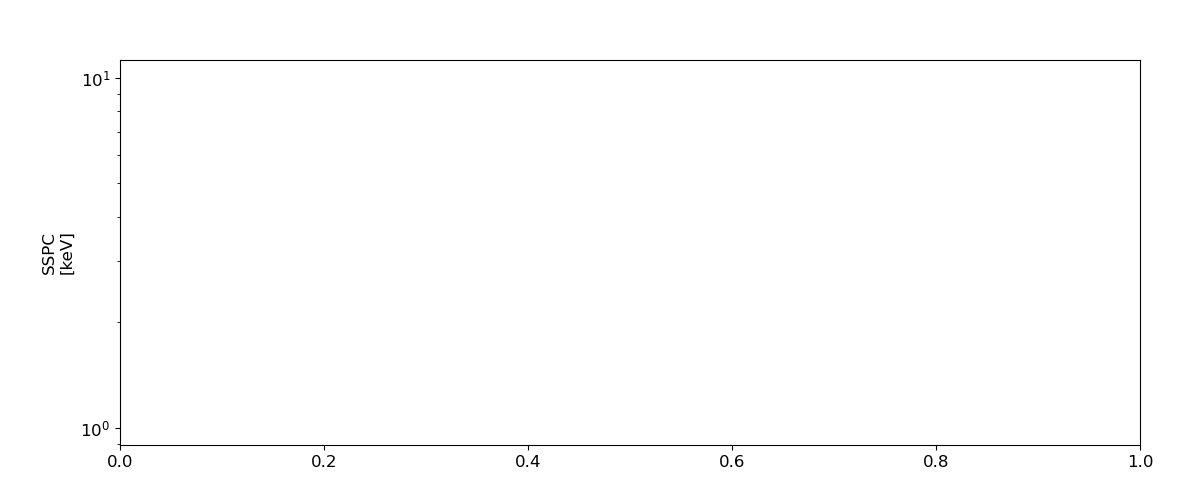

0 : brl1G_Quality
1 : brl1G_FSPC1
2 : brl1G_FSPC2
3 : brl1G_FSPC3
4 : brl1G_FSPC4
5 : brl1G_SSPC
6 : brl1G_Peak_511
7 : brl1G_SSPC_UNCAL
8 : brl1G_SSPC_BGSUB
['brl1G_Quality', 'brl1G_FSPC1', 'brl1G_FSPC2', 'brl1G_FSPC3', 'brl1G_FSPC4', 'brl1G_SSPC', 'brl1G_Peak_511', 'brl1G_SSPC_UNCAL', 'brl1G_SSPC_BGSUB']


In [10]:
#use pytplot to extract the sspc data
ts, cnts, energy_levels = pytplot.get_data('brl1G_SSPC')

#use the background subtraction function
bkg_sub_cnts = pyspedas.barrel.bg_sub(ts, cnts, bkg_start, bkg_end)
pytplot.store_data('brl1G_SSPC_BGSUB', data={'x':ts, 'y': bkg_sub_cnts})

pytplot.tplot('brl1G_SSPC_BGSUB')


Finally, we can create a new tplot variable containing out background-subtracted spectra and plot it.

28-Sep-23 19:20:47: /home/wrexroad/anaconda3/envs/pybdas/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)

28-Sep-23 19:20:47: /home/wrexroad/anaconda3/envs/pybdas/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)



0 : brl1G_Quality
1 : brl1G_FSPC1
2 : brl1G_FSPC2
3 : brl1G_FSPC3
4 : brl1G_FSPC4
5 : brl1G_SSPC
6 : brl1G_Peak_511
7 : brl1G_SSPC_UNCAL
8 : brl1G_SSPC_BGSUB
9 : brl1G_SSPC_SUB_BKG1
['brl1G_Quality', 'brl1G_FSPC1', 'brl1G_FSPC2', 'brl1G_FSPC3', 'brl1G_FSPC4', 'brl1G_SSPC', 'brl1G_Peak_511', 'brl1G_SSPC_UNCAL', 'brl1G_SSPC_BGSUB', 'brl1G_SSPC_SUB_BKG1']


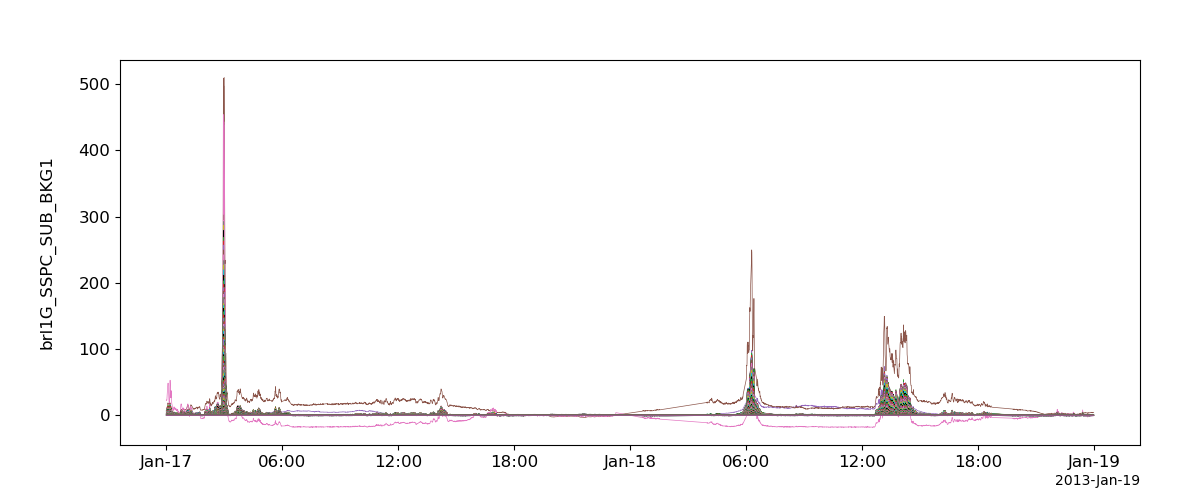

In [13]:
pytplot.store_data("brl1G_SSPC_SUB_BKG1", data={'x':ts, 'y': bkg_sub_cnts, 'v': energy_levels})
print(pytplot.tplot_names())
pytplot.tplot("brl1G_SSPC_SUB_BKG1")